### **GOLD PRICE PREDICTION**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

***data Collection & Processing:***

In [3]:
df = pd.read_csv('9gold.csv')

In [4]:
df

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [6]:
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [7]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


***Correlation:***

In [ ]:
#since, our DataFrame has a ''Date'' column of type `object`, which is causing the issue. Since correlation calculations only work on numeric data, we need to exclude that ''Date'' column.
correlation = df.drop(columns=['Date']).corr()
correlation

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


<Axes: >

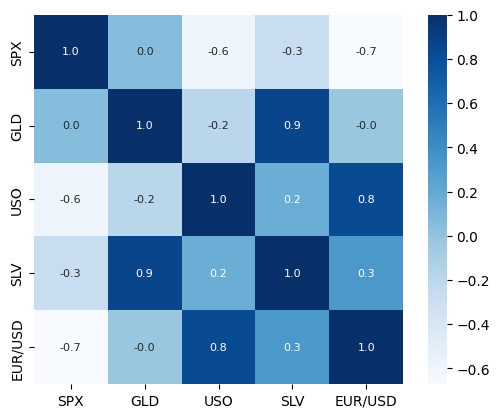

In [10]:
#contructing a HEATMAP to understand the correlation:
plt.Figure(figsize=(8,8))
sns.heatmap(correlation,
            cbar=True, #colour bar
            square=True, #sq format
            fmt='.1f', #only one decimal point
            annot=True, #name of the columns
            annot_kws={'size':8}, #columns size
            cmap='Blues' #colour
            )

In [12]:
#correlation values of GLD:
correlation['GLD']

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64

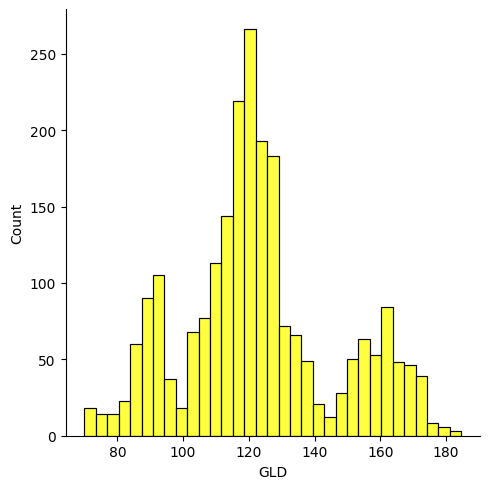

In [13]:
#check the distribution of the gold price
sns.displot(df['GLD'],color='yellow')

***splitting the features and target:***

In [15]:
X = df.drop(['Date','GLD'], axis=1)
X

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [16]:
y = df['GLD']
y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

***splitting into Training & Test data:***

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
regressor = RandomForestRegressor(n_estimators=100)

In [20]:
#training the model
regressor.fit(X_train,y_train)

RandomForestRegressor()

***Model Evaluation:***

In [22]:
#prediction on test data
test_data_prediction = regressor.predict(X_test)
test_data_prediction

array([122.37049967, 130.45870317, 127.55649992,  96.63179732,
       119.09840075, 114.26319931, 124.67770162, 117.79809953,
       107.92790123,  98.16919971,  95.47809968, 167.52889869,
       149.29310041, 116.20540049, 170.77950174,  84.75779991,
       123.05459872, 109.35399707, 113.20810074, 131.49580283,
       124.21639931, 113.68240103, 115.73960047, 108.72529949,
       108.63230152, 125.89129931, 118.84290001, 112.29129943,
       113.4203012 , 125.00449905, 145.98610115,  89.41439977,
       167.39799943, 113.70839934, 108.31070129, 120.21600118,
       141.54819887, 161.3393002 , 173.90739829, 152.93280143,
       119.78950117, 113.48880043, 121.30819997, 113.71509918,
       122.0300004 , 107.88760077,  88.49379898, 114.41449945,
       130.00260308, 118.09080087, 103.64540108, 129.92430267,
       107.12359862, 160.61100422, 131.55179967, 118.11669977,
       147.00470055, 134.86500231,  95.39670133, 124.64090132,
       115.15629866,  86.24850063, 104.27519912, 113.93

In [24]:
#R sq error:
error_score = metrics.r2_score(y_test, test_data_prediction) #real vs predicted data
print("Rsq error : ", error_score)

Rsq error :  0.9900752132264385


***Compare the actual and predicted values in a plot:***

In [26]:
y_test

[122.32,
 129.899994,
 126.980003,
 96.5,
 117.580002,
 115.0,
 125.440002,
 116.93,
 108.220001,
 98.830002,
 96.910004,
 168.789993,
 151.029999,
 115.839996,
 169.809998,
 85.129997,
 122.639999,
 107.849998,
 110.449997,
 131.240005,
 124.940002,
 115.379997,
 116.650002,
 109.25,
 110.529999,
 125.720001,
 123.709999,
 114.949997,
 114.290001,
 126.860001,
 146.869995,
 89.440002,
 167.270004,
 115.050003,
 117.110001,
 120.620003,
 141.630005,
 160.649994,
 173.309998,
 152.300003,
 117.459999,
 113.150002,
 121.309998,
 113.470001,
 121.349998,
 107.519997,
 88.839996,
 114.440002,
 130.559998,
 117.739998,
 99.669998,
 129.770004,
 106.169998,
 161.070007,
 127.93,
 115.940002,
 143.470001,
 130.110001,
 95.730003,
 124.360001,
 116.620003,
 85.599998,
 104.099998,
 112.610001,
 86.519997,
 122.400002,
 116.470001,
 112.660004,
 166.399994,
 91.989998,
 80.809998,
 160.559998,
 157.639999,
 103.419998,
 135.020004,
 110.400002,
 124.43,
 127.739998,
 112.440002,
 119.910004,
 1

In [ ]:
y_test = list(y_test)
y_test

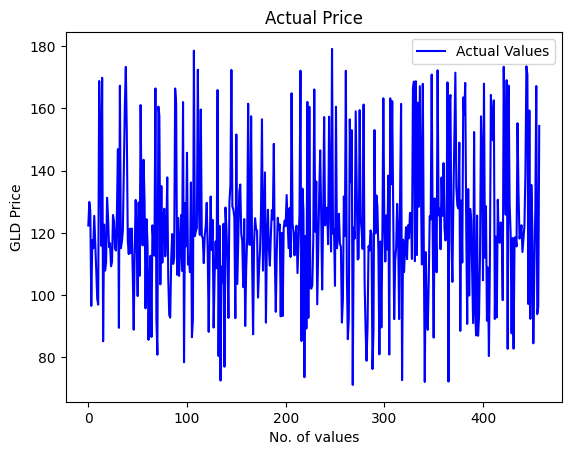

In [27]:
plt.plot(y_test, color='blue', label = 'Actual Values')
#plt.plot(test_data_prediction, color='green', label='Predicted Values')
plt.title('Actual Price')
plt.xlabel('No. of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

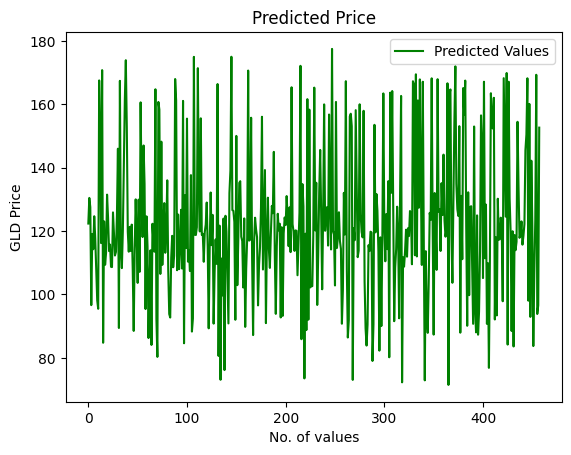

In [28]:
#plt.plot(Y_test, color='blue', label = 'Actual Values')
plt.plot(test_data_prediction, color='green', label='Predicted Values')
plt.title('Predicted Price')
plt.xlabel('No. of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

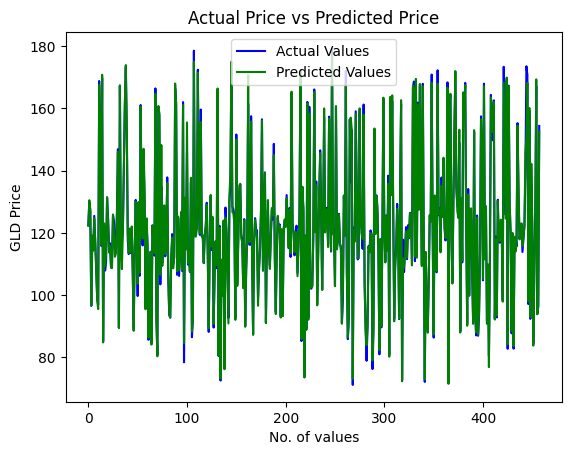

In [29]:
plt.plot(y_test, color='blue', label = 'Actual Values')
plt.plot(test_data_prediction, color='green', label='Predicted Values')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('No. of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()